<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_11_ProjEleven_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


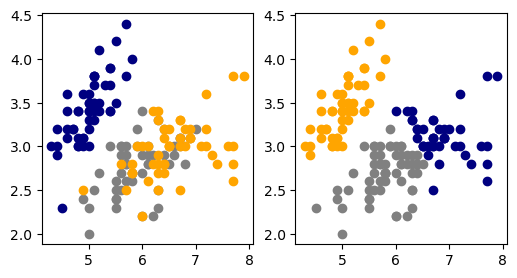

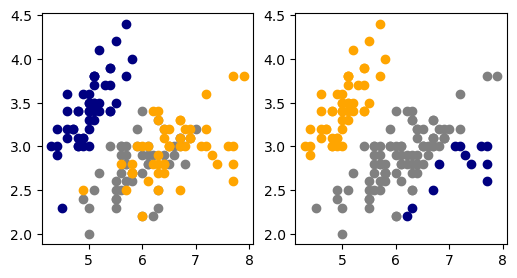

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import (mixture, datasets)

x, y = datasets.load_iris(return_X_y=True)
x0 = x[y == 0, 0:2]
x1 = x[y == 1, 0:2]
x2 = x[y == 2, 0:2]

gm = mixture.GaussianMixture(n_components=3)
gm.fit(x[:, 0:2])
y_pred = gm.predict(x[:, 0:2])

x0_gm = x[y_pred == 0, 0:2]
x1_gm = x[y_pred == 1, 0:2]
x2_gm = x[y_pred == 2, 0:2]

fig, ax = plt.subplots(1,2, figsize=(6,3))
ax[0].scatter(x0[:,0], x0[:,1], c="navy")
ax[0].scatter(x1[:,0], x1[:,1], c="gray")
ax[0].scatter(x2[:,0], x2[:,1], c="orange")
ax[1].scatter(x0_gm[:,0], x0_gm[:,1], c="navy")
ax[1].scatter(x1_gm[:,0], x1_gm[:,1], c="orange")
ax[1].scatter(x2_gm[:,0], x2_gm[:,1], c="gray")



gm = mixture.BayesianGaussianMixture(n_components=3)
gm.fit(x[:, 0:2])
y_pred = gm.predict(x[:, 0:2])

x0_gm = x[y_pred == 0, 0:2]
x1_gm = x[y_pred == 1, 0:2]
x2_gm = x[y_pred == 2, 0:2]

fig, ax = plt.subplots(1,2, figsize=(6,3))
ax[0].scatter(x0[:,0], x0[:,1], c="navy")
ax[0].scatter(x1[:,0], x1[:,1], c="gray")
ax[0].scatter(x2[:,0], x2[:,1], c="orange")
ax[1].scatter(x0_gm[:,0], x0_gm[:,1], c="navy")
ax[1].scatter(x1_gm[:,0], x1_gm[:,1], c="orange")
ax[1].scatter(x2_gm[:,0], x2_gm[:,1], c="gray")

In [ ]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

from sklearn import manifold
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA

from collections import OrderedDict
from functools import partial
from time import time
from IPython import display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

print(sys.version)
print(sys.executable)
print("numpy:", np.__version__)

3.11.4 (main, Jul  5 2023, 08:41:25) [Clang 14.0.6 ]
/Applications/anaconda3/envs/PyML/bin/python
numpy: 1.23.5


In [ ]:
X, y = datasets.load_digits(return_X_y=True)
for i in range(250, 501, 2):
    fig = plt.figure(figsize=(5,5))
    xe = manifold.TSNE(n_components=2, n_iter=i, perplexity=30, random_state=0).fit_transform(X)
    plt.scatter(xe[:,0], x[:,1], c=y)
    for i, txt in enumerate(y.tolist()):
        if (i%20==0):
            plt.annotate(str(txt), (xe[i,0], x[i,1]))
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    plt.axis("off")
    display.clear_output(wait=True)
    display.display(pl.gcf())
    plt.clf()
    plt.cla()
    plt.close("all")

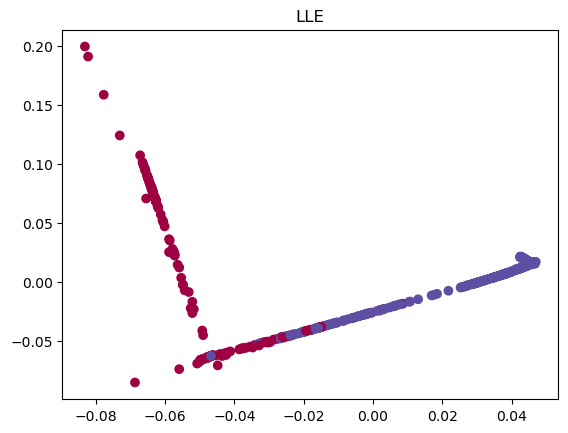

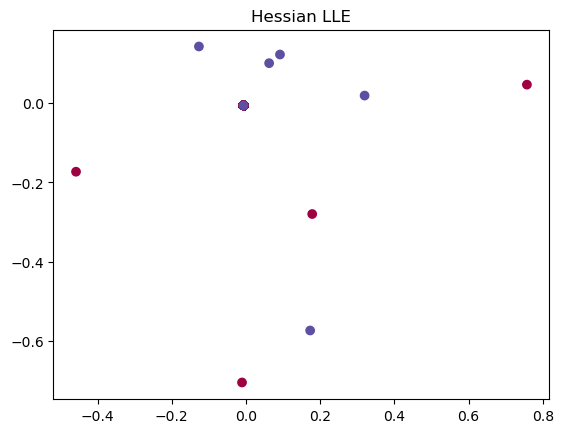

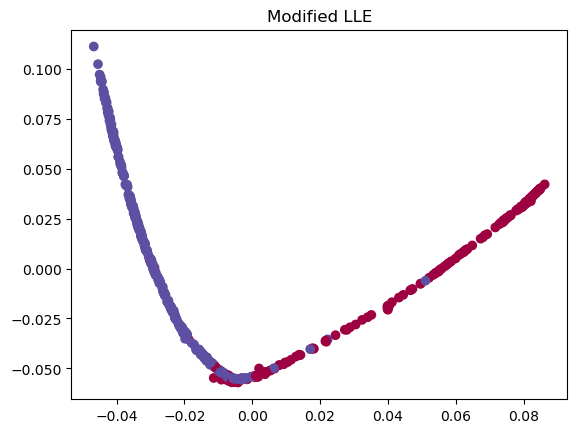

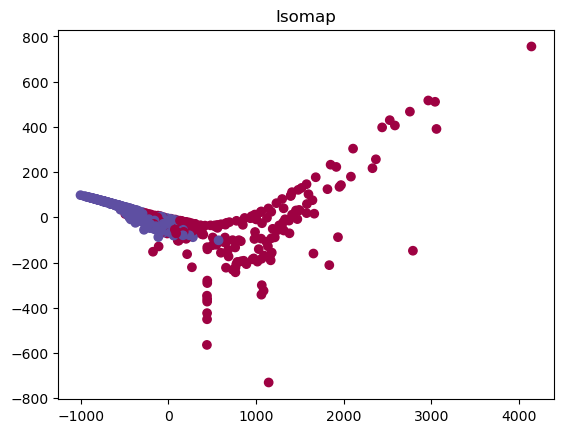

/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


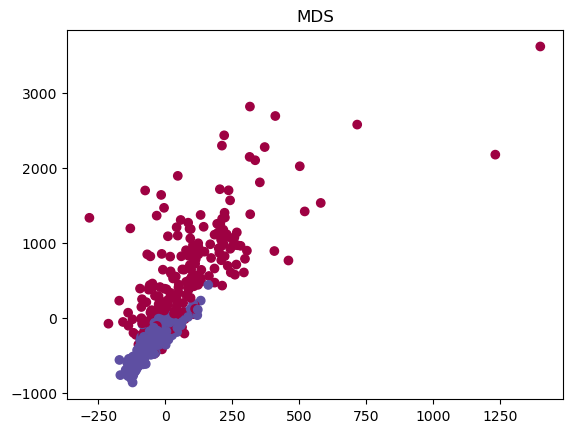

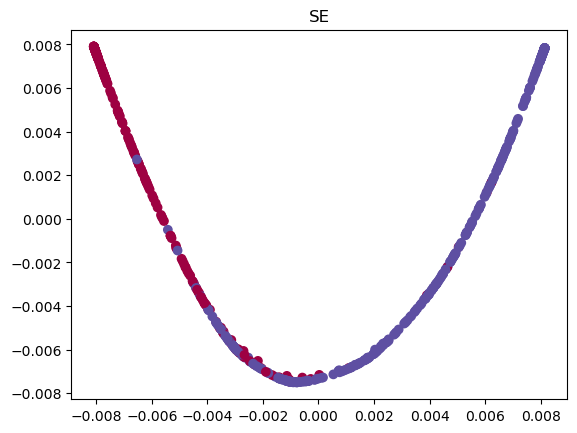

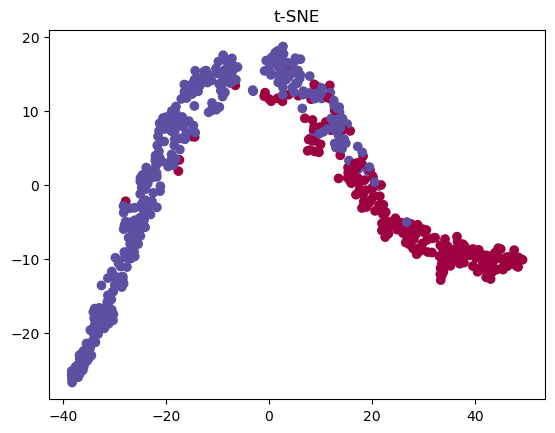

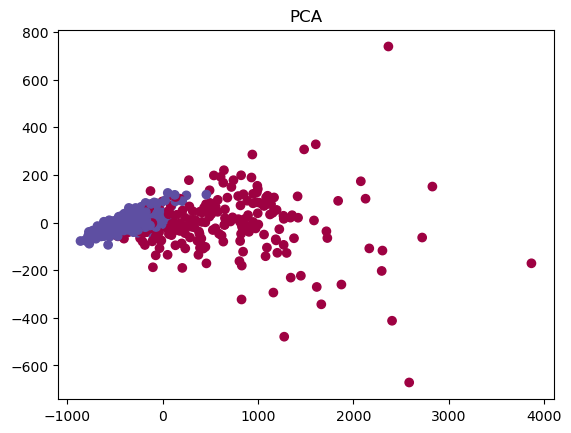

In [ ]:
def plotthis(X, color):
    models = [
        ("LLE", manifold.LocallyLinearEmbedding(method="standard")),
        ("Hessian LLE", manifold.LocallyLinearEmbedding(method="hessian", eigen_solver="dense", n_neighbors=8)),
        ("Modified LLE", manifold.LocallyLinearEmbedding(method="modified")),
        ("Isomap", manifold.Isomap()),
        ("MDS", manifold.MDS()),
        ("SE", manifold.SpectralEmbedding()),
        ("t-SNE", manifold.TSNE()),
        ("PCA", PCA(n_components=2))
    ]
    for i, (label, method) in enumerate(models):
        Y = method.fit_transform(X)
        plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
        plt.title(label)
        plt.show()

X, y = datasets.load_breast_cancer(return_X_y=True)
color = y
plotthis(X, color)